<a href="https://colab.research.google.com/github/leeryleprechaun/MSDS_Practicum_Public/blob/main/week_7_full_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Optera Data Project and Presentation File

## Objective
#### The goal of this project is to impute missing catagory 3 emissions based on reported company values

## Outline
### EDA
#### The initial file is huge, 450 mb, it was cut up into individual sheets to start

### Working Data
#### A file was created that contained all the working data for the model, this combined company names, scope 3 emissions, and financial data

### Modeling
#### Modeling was then performed to determine if scope 3 emissions could be reasonably imputed using the complete data columns


###### Matthew Peetz, 2023
###### MSDS Practicum I
###### Regis University in Collaboration with Optera

# EDA

In [ ]:
#Loading in the files and importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

url=''
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
df_revenue = pd.read_csv(url)

url=''
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
c6_5 = pd.read_csv(url)


url=''
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
name_file = pd.read_csv(url)


In [ ]:
df_revenue.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2534 entries, 0 to 2533
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Company Name       2534 non-null   object 
 1   Data Year          2534 non-null   int64  
 2   Revenue (in $USD)  2534 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.5+ KB


In [ ]:
c6_5.nunique()

Account number                   8381
Organization                     8381
Country/Areas                     110
Public                              1
Response received date           8353
Primary activity                  197
Primary sector                     60
Primary industry                   14
Primary questionnaire sector       18
Row                                17
RowName                            17
C6_5_C1                             6
C6_5_C2                         19477
C6_5_C3                          3492
C6_5_C4                           643
C6_5_C5                         48541
dtype: int64

In [ ]:
name_file.head(2)

,Organization_ID,Name,Source.Organization.ID
0,1,3M Company,3M Co
1,2,Abbott Laboratories,Abbott Laboratories


# Changing File to Something Useful
#### The c6_5 file is not holding the information in a very useful manner, Columns were manipulated to be more helpful.

In [ ]:
# Replacing all of the "Question not applicable with NaN"
df = c6_5
df = df.replace('Question not applicable', 'NaN')
df.head(2)

In [ ]:
#data frame of just those companies that listed scope three emissions as Relavant and Calculated
#relevant_df = df[df.C6_5_C1 == ("Relevant, calculated")]
#relevant_df.drop(['Public','Response received date', 'Response received date', 'Primary questionnaire sector', 'RowName', 'C6_5_C1', 'C6_5_C3', 'C6_5_C5'],axis=1,inplace=True)

#relevant_df['C6_5_C2'] = relevant_df['C6_5_C2'].astype(float)
#relevant_df.info()

In [ ]:
#Pivot table to list all of the areas of impact and the emission values
df['C6_5_C2'] = df['C6_5_C2'].astype(float)
pivot_df = df.pivot(index='Organization', columns='Row', values = ['C6_5_C2'])
pivot_df.head(10)

In [ ]:
#replacing 'nan' with a zero value
pivot_df = pivot_df.replace('Nan', 0)
pivot_df.head(5)

In [ ]:
#Summing emissions values
total_scope_3 = pivot_df

total_scope_3['total_scope_3_emissions'] = total_scope_3.sum(axis=1)

total_scope_3.head(2)

In [ ]:
# creating a list of all the organizations, and then limiting them to 1 copy of each
df_organization = df.drop_duplicates(subset=['Organization'], keep='first')
df_organization.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8381 entries, 0 to 142460
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Account number                8381 non-null   int64  
 1   Organization                  8381 non-null   object 
 2   Country/Areas                 8381 non-null   object 
 3   Public                        8381 non-null   object 
 4   Response received date        8381 non-null   object 
 5   Primary activity              8379 non-null   object 
 6   Primary sector                8379 non-null   object 
 7   Primary industry              8379 non-null   object 
 8   Primary questionnaire sector  8380 non-null   object 
 9   Row                           8381 non-null   int64  
 10  RowName                       8381 non-null   object 
 11  C6_5_C1                       6338 non-null   object 
 12  C6_5_C2                       3008 non-null   float64
 13  C

In [ ]:
# Merging pivot table with organiation data
combined = pd.merge(df_organization, total_scope_3 , on = 'Organization', how = 'outer')
combined.head(5)

In [ ]:
# Looking at frame
combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8381 entries, 0 to 8380
Data columns (total 34 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Account number                8381 non-null   int64  
 1   Organization                  8381 non-null   object 
 2   Country/Areas                 8381 non-null   object 
 3   Public                        8381 non-null   object 
 4   Response received date        8381 non-null   object 
 5   Primary activity              8379 non-null   object 
 6   Primary sector                8379 non-null   object 
 7   Primary industry              8379 non-null   object 
 8   Primary questionnaire sector  8380 non-null   object 
 9   Row                           8381 non-null   int64  
 10  RowName                       8381 non-null   object 
 11  C6_5_C1                       6338 non-null   object 
 12  C6_5_C2                       3008 non-null   float64
 13  C6_

In [ ]:
# dropping unwanted rows
df_final = combined
df_final.drop(['Public', 'Response received date', 'Row', 'RowName', 'C6_5_C1', 'C6_5_C2', 'C6_5_C3', 'C6_5_C4', 'C6_5_C5'],axis=1,inplace=True)
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8381 entries, 0 to 8380
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Account number                8381 non-null   int64  
 1   Organization                  8381 non-null   object 
 2   Country/Areas                 8381 non-null   object 
 3   Primary activity              8379 non-null   object 
 4   Primary sector                8379 non-null   object 
 5   Primary industry              8379 non-null   object 
 6   Primary questionnaire sector  8380 non-null   object 
 7   (C6_5_C2, 1)                  3008 non-null   float64
 8   (C6_5_C2, 2)                  1868 non-null   float64
 9   (C6_5_C2, 3)                  2806 non-null   float64
 10  (C6_5_C2, 4)                  2320 non-null   float64
 11  (C6_5_C2, 5)                  2930 non-null   float64
 12  (C6_5_C2, 6)                  3471 non-null   float64
 13  (C6

In [ ]:
df_final.head(2)

In [ ]:
# renaming the labels
namesList = ['cat_1', 'cat_2', 'cat_3', 'cat_4', 'cat_5', 'cat_6', 'cat_7','cat_8','cat_9','cat_10','cat_11','cat_12','cat_13','cat_14','cat_15','cat_16','cat_17','total_scope_3_emissions']
df_final.columns = df_final.columns[:7].tolist() + namesList
df_final.head(10)

In [ ]:
# Saving and exporting the final data frame
#Save file to google drive

from google.colab import drive

drive.mount('/content/drive')
path = '/content/drive/My Drive/output.csv'

with open(path, 'w', encoding = 'utf-8-sig') as f:
  df_final.to_csv(f)


Mounted at /content/drive


In [ ]:
# Group by accounts to see how many accounts are in each Primary Sector
df_account = df_final.groupby(['Primary sector'])['Account number'].count().reset_index()
df_account

,Primary sector,Account number
0,Air transport,35
1,"Bars, hotels & restaurants",46
2,Biotech & pharma,125
3,Cement & concrete,30
4,Chemicals,423
5,Coal mining,7
6,Commercial & consumer services,120
7,Construction,237
8,Convenience retail,61
9,Crop farming,27


In [ ]:
# Group by accounts to see how many accounts are in each Country
df_account = df_final.groupby(['Country/Areas'])['Account number'].count().reset_index()
df_account

,Country/Areas,Account number
0,Afghanistan,1
1,Algeria,1
2,Argentina,33
3,Australia,70
4,Austria,32
...,...,...
105,United Arab Emirates,16
106,United Kingdom of Great Britain and Northern I...,606
107,United States of America,1309
108,Uruguay,4


In [ ]:
# Group by accounts to see how many accounts are in each primary industry
df_account = df_final.groupby(['Primary industry'])['Account number'].count().reset_index()
df_account

,Primary industry,Account number
0,Apparel,207
1,"Biotech, health care & pharma",222
2,Corporate Tags,3
3,"Food, beverage & agriculture",413
4,Fossil Fuels,142
5,Hospitality,64
6,Infrastructure,426
7,International bodies,2
8,Manufacturing,3330
9,Materials,767


In [ ]:
#Average CO2 emissions by sector
df_mean = df_final.groupby(['Primary sector'])['total_scope_3_emissions'].mean().reset_index()
df_mean = df_mean.sort_values(by = 'total_scope_3_emissions')

df_mean

,Primary sector,total_scope_3_emissions
22,International bodies,0.000000e+00
17,Government agencies,0.000000e+00
13,Entertainment facilities,1.816808e+05
59,Wood & rubber products,2.023520e+05
51,Specialized professional services,2.771457e+05
19,IT & software development,2.882891e+05
45,Print & publishing services,3.166812e+05
52,Textiles & fabric goods,3.390931e+05
40,Other mineral mining,3.833245e+05
57,Web & marketing services,4.005784e+05


In [ ]:
# Normalize average CO2 emissions by number of accounts 
df_mean['CO2_normalized_to_accounts'] = df_mean['total_scope_3_emissions'] /df_account['Account number']

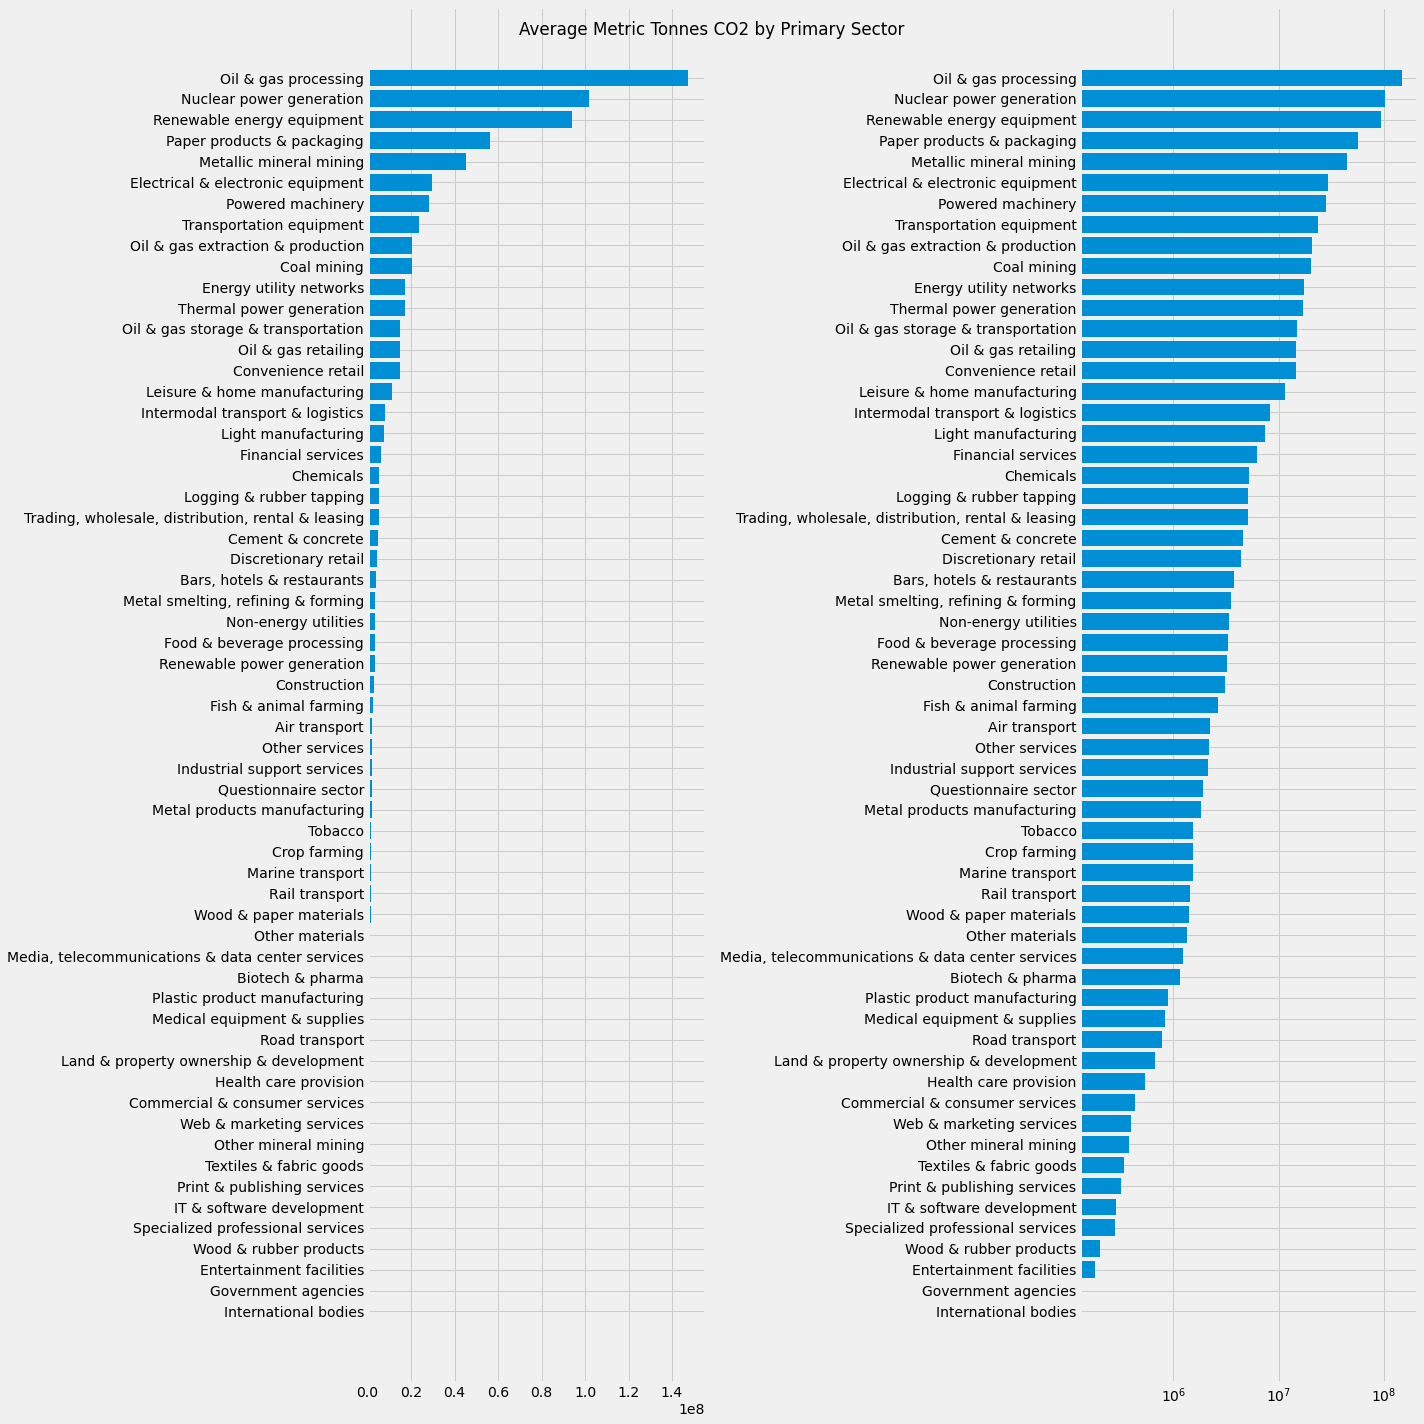

In [ ]:
# Plot (normal and log scale) Average Metric Tonnes CO2 by Primary Sector 

from matplotlib import pyplot as plt
plt.style.use('fivethirtyeight')
import numpy as np
import seaborn as sns
import os


df_mean_sorted = df_mean.sort_values('total_scope_3_emissions')
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 20))
ax1.barh(y = df_mean_sorted['Primary sector'], width = df_mean_sorted['total_scope_3_emissions'])
ax2.barh(y = df_mean_sorted['Primary sector'], width = df_mean_sorted['total_scope_3_emissions'])
plt.xscale("log")
fig.tight_layout()
plt.suptitle('Average Metric Tonnes CO2 by Primary Sector') 
plt.show()

# Matching Up Names
#### There are only 88 names that are matching with the revenue data, A second list of coded names was provided and matching will be performed using this list.

In [ ]:
# Creating a copy of the final df
df2 = df_final

In [ ]:
# A list of all the companies in the revenue data
company_list = df_revenue['Company Name'].tolist()
print(len(company_list))

2534


In [ ]:
# A list of all the organizations in the emissions list
org_list = df2['Organization'].tolist()
print(len(org_list))

8381


In [ ]:
# Taking a look at what companies are in both lists
complete_df = set(company_list) & set(org_list)
print(len(complete_df))

88


In [ ]:
#Taking the source_org_id and converting it to a lsit
source_org_list = name_file['Source.Organization.ID'].tolist()
print(len(source_org_list))

3303


In [ ]:
# Comparing the new lists
complete_df2 = set(source_org_list) & set(org_list)
print(len(complete_df2))

273


#### I am seeing slightly better matching with this list, I am also going to look at the company ID codes

In [ ]:
#Taking the source_org_id and converting it to a lsit
org_id_list = name_file['Organization_ID'].tolist()
print(len(source_org_list))

3303


In [ ]:
# I need to change these values to numbers
num_list = []
for i in org_id_list:
  a = int(i)
  num_list.append(a)

In [ ]:
#Looking to see if I get better matching on the id numbers
org_id_list_2 = df2['Account number'].tolist()
print(len(org_id_list_2))

8381


In [ ]:
# I need to get rid of the decimal place to compare the lists correctly
new_list = []
for i in org_id_list_2:
  a = int(i)
  new_list.append(a)

In [ ]:
# Comparing the new lists
list_compare = set(new_list) & set(num_list)
print(len(complete_df2))

273


#### As you can see, the matching is still really low, 273 values

# DIFFLIB - Using the difflib packags to match up names

https://docs.python.org/3/library/difflib.html

## Status
#### There are only 273 out of 8000+ names matching to the revenue data. A new strategy must be developed to better match up company names to revenue data.

## Strategy
#### A new column, 'possible_match', will be created.
#### Names including common terms will be dropped [corporation, Ltd, Incorporated, etc.]
#### the difflib library will be used to create possible matches
#### Model was tuned to use the following inputes [ print(dl.get_close_matches(name, company_name_list, n=1, cutoff=0.4))]to run this argument.

###### NOTE: This work is more fully explored and documented in Week_3_Financial_Data notebook
https://drive.google.com/file/d/1Y385l7K16qQZ9KWBGGBk1lb0l-ZDsUgW/view?usp=sharing

In [ ]:
df_final

In [ ]:
code_file = name_file
code_file

In [ ]:
df_revenue

In [ ]:
#Combining current file and matches based on the current name
#Currently three frames exist, pivot_df, df_revenue, and code_df
merge_1 = pd.merge(df_final, name_file, left_on='Organization', right_on='Name')
merge_1.head(2)

In [ ]:
#Merging frames
df_rev_merge = pd.merge(merge_1, df_revenue, left_on='Source.Organization.ID', right_on='Company Name')
df_rev_merge = df_rev_merge.drop(columns = ['Organization_ID', 'Source.Organization.ID', 'Name'])
df_rev_merge.drop(df_rev_merge.columns[[0]], axis = 1)

df_rev_merge

Status
As of right now, there is a data frame called 'df_rev_merge' it contains

327 companies that have correctly merged data, next step is to run the difflib name matching program

In [ ]:
# Adding back the missing companies
df_all = df_final.join(df_rev_merge.set_index('Organization'), on='Organization', lsuffix='x', rsuffix='y')
df_all.count()

Account numberx                  8382
Organization                     8382
Country/Areasx                   8382
Primary activityx                8380
Primary sectorx                  8380
Primary industryx                8380
Primary questionnaire sectorx    8381
cat_1x                           3009
cat_2x                           1869
cat_3x                           2807
cat_4x                           2320
cat_5x                           2931
cat_6x                           3472
cat_7x                           2937
cat_8x                            791
cat_9x                           1566
cat_10x                           556
cat_11x                          1302
cat_12x                          1284
cat_13x                           691
cat_14x                           385
cat_15x                           636
cat_16x                           242
cat_17x                           202
total_scope_3_emissionsx         8382
Account numbery                   327
Country/Area

In [ ]:
# Rearranging the columns to look at matched names
cols = list(df_all.columns.values)
cols.pop(cols.index('Organization'))
cols.pop(cols.index('Company Name'))
df_all = df_all[['Organization', 'Company Name'] + cols]
df_all.head(10)

In [ ]:
# Rearranging the columns to view matched IDs
cols = list(df_all.columns.values)
cols.pop(cols.index('Account numberx'))
cols.pop(cols.index('Account numbery'))
df_all = df_all[['Account numberx', 'Account numbery'] + cols]
df_all

In [ ]:
for col in df_all.columns:
  print(col)

In [ ]:
# Dropping unwanted columns
df_all.drop(['Primary questionnaire sectorx', 'Account numbery','Country/Areasy', 'Primary activityy',
  'Primary sectory', 'Primary industryy', 'Primary questionnaire sectory', 'cat_1y',
  'cat_2y', 'cat_3y', 'cat_4y', 'cat_5y', 'cat_6y', 'cat_7y', 'cat_8y', 'cat_9y', 'cat_10y',
  'cat_11y', 'cat_12y', 'cat_13y', 'cat_14y', 'cat_15y', 'cat_16y', 'cat_17y',
  'total_scope_3_emissionsy', 'Data Year', 'total_scope_3_emissionsx'],axis=1,inplace=True)


In [ ]:
df_all

In [ ]:
# Loading in the package
import difflib as dl
# First I am going to make a list of all the company names in the Revenue file
company_name_list = df_revenue['Company Name'].tolist()
print(len(company_name_list))
print(company_name_list)

In [ ]:
# Creating a possible match column in the df_all frame
df_all.insert(loc = 1, column = 'possible_name', value = 'no_match')
df_all.head(2)

In [ ]:
# Change the revenue value to a number
df_all['Revenue (in $USD)'] = df_all['Revenue (in $USD)'].astype(float)
df_all['Revenue (in $USD)'] = df_all['Revenue (in $USD)'].fillna(0)

In [ ]:
# Creating a if - then - else loop for blank values
i = 1
j = 25
for ind in df_all.index:
  x = (df_all.iat[i, j])
  i = i+1
  if x == 0:
    name = df_all['Organization'].iloc[i]
    name = name.lower()
    if 'corporation' in name:
      name = name.replace('corporation', '')
    if 'infraestructuras' in name:
      name = name.replace('infraestructuras', '')
    if 'incorporated' in name:
      name = name.replace('incorporated', '')
    if 'holidings' in name:
      name = name.replace('holdings', '')  
    if 'industries' in name:
      name = name.replace('industries', '')  
    if 'technology' in name:
      name = name.replace('technology', '') 
    if 'ltd.' in name:
      name = name.replace('ltd.', '') 
    if 'group' in name:
      name = name.replace('group', '') 
    if 'international' in name:
      name = name.replace('international', '') 

    prop_match = (dl.get_close_matches(name, company_name_list, n=1, cutoff=0.6)) # Finding the propbable match
    try:
      prop_match = (prop_match[0])
      prop_match = ''.join(prop_match) # trying to add this in
    except IndexError:
      gotdata = 'null'

    
    #prop_match = (prop_match[0])
    print(prop_match)
    df_all.iat[i, 1] = prop_match

    print(i)
  else:
    df_all.iat[i, 1] = 'revenue_correct'
  if i > 8380:
    break

In [ ]:
df_all.head()

In [ ]:
#Save file to google drive

from google.colab import drive

drive.mount('/content/drive')
path = '/content/drive/My Drive/output.csv'

with open(path, 'w', encoding = 'utf-8-sig') as f:
  df_all.to_csv(f)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#### Next the file was downloaded and checked by hand, there were about 2073 possible matched names. The file was sorted as a list by possible names and the names were confirmed by hand, the names did or did not match, and then the fiel was saved. Column names were corrected at this time.

In [ ]:
# Corrected file with matched names uploaded
url=''
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
master_df = pd.read_csv(url)
master_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8382 entries, 0 to 8381
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        8382 non-null   int64  
 1   account_number    8382 non-null   int64  
 2   possible_name     8382 non-null   object 
 3   organization      8382 non-null   object 
 4   company_name      327 non-null    object 
 5   country_area      8382 non-null   object 
 6   primary_activity  8380 non-null   object 
 7   primary_sector    8380 non-null   object 
 8   primary_industry  8380 non-null   object 
 9   cat_1             3009 non-null   float64
 10  cat_2             1869 non-null   float64
 11  cat_3             2807 non-null   float64
 12  cat_4             2320 non-null   float64
 13  cat_5             2931 non-null   float64
 14  cat_6             3472 non-null   float64
 15  cat_7             2937 non-null   float64
 16  cat_8             791 non-null    float64


In [ ]:
df_revenue.head(2)

In [ ]:
#Combining frames
#Current frames are, pivot_df, df_revenue, and code_df
new_df = pd.merge(master_df, df_revenue, left_on='possible_name', right_on='Company Name')
new_df

In [ ]:
#Adding the frames together
frames = [master_df, new_df]
results_df = pd.concat(frames)
results_df

In [ ]:
# Adding a blank spot for the final revenue value
results_df['revenue_final'] = 0
results_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 8916 entries, 0 to 533
Data columns (total 31 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         8916 non-null   int64  
 1   account_number     8916 non-null   int64  
 2   possible_name      8916 non-null   object 
 3   organization       8916 non-null   object 
 4   company_name       508 non-null    object 
 5   country_area       8916 non-null   object 
 6   primary_activity   8914 non-null   object 
 7   primary_sector     8914 non-null   object 
 8   primary_industry   8914 non-null   object 
 9   cat_1              3358 non-null   float64
 10  cat_2              2156 non-null   float64
 11  cat_3              3152 non-null   float64
 12  cat_4              2609 non-null   float64
 13  cat_5              3266 non-null   float64
 14  cat_6              3861 non-null   float64
 15  cat_7              3279 non-null   float64
 16  cat_8              885 no

In [ ]:
# looking at the df

results_df = results_df.fillna(0)

In [ ]:
# Sorting the frame and creating a new revenue column


#0-30 Rows
# 30 is revenue_final
# 29 is Revenue (in $USD)
# 26 is Revenue


i = 0

while i < 8915:
  j = 30
  value = results_df.iat[i, j]

  if value == 0:
    j = 29                             # j is 29
    value = results_df.iat[i, j]
    if value == 0:
      j = 26                           # j is 26
      value = results_df.iat[i, j]
      if value == 0:
        results_df.iat[i, 30] = 'no revenue value'
        i = i + 1

      else:
        print(j)
        results_df.iat[i, 30] = value
        i = i +1
    else:
      print(j)
      results_df.iat[i, 30] = value
      i = i +1

  else:
    print('this is where you are stuck')
    results_df.iat[i, 30] = value
    i = i + 1


In [ ]:
results_df

In [ ]:
results_df.info()

In [ ]:
# drop unwanted columns
# drop the duplicate named companies
small_df = results_df
small_df = small_df.drop(small_df.columns[[0,2,4,26,27,28,29]], axis = 1)

small_df

In [ ]:
#Save file to google drive

from google.colab import drive

drive.mount('/content/drive')
path = '/content/drive/My Drive/output.csv'

with open(path, 'w', encoding = 'utf-8-sig') as f:
  small_df.to_csv(f)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# This frame now includes all the companies with match revenue data, a total of 534 companies
url=''
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
df3 = pd.read_csv(url)
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 533 entries, 0 to 532
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        533 non-null    int64  
 1   account_number    533 non-null    int64  
 2   organization      533 non-null    object 
 3   country_area      533 non-null    object 
 4   primary_activity  533 non-null    object 
 5   primary_sector    533 non-null    object 
 6   primary_industry  533 non-null    object 
 7   cat_1             533 non-null    float64
 8   cat_2             533 non-null    float64
 9   cat_3             533 non-null    float64
 10  cat_4             533 non-null    float64
 11  cat_5             533 non-null    float64
 12  cat_6             533 non-null    float64
 13  cat_7             533 non-null    float64
 14  cat_8             533 non-null    float64
 15  cat_9             533 non-null    float64
 16  cat_10            533 non-null    float64
 1

# Adjusting Emissions for Revenue
#### Next step is to adjust the companies emissions for their revenue to scale the data, this will be in $1 millions of dollars of revenue

In [ ]:
adjusted_df = df3
adjusted_df['cat_1_adj'] = (adjusted_df['cat_1'] / (adjusted_df['revenue_final'] / 1000000))
adjusted_df['cat_2_adj'] = (adjusted_df['cat_2'] / (adjusted_df['revenue_final'] / 1000000))
adjusted_df['cat_3_adj'] = (adjusted_df['cat_3'] / (adjusted_df['revenue_final'] / 1000000))
adjusted_df['cat_4_adj'] = (adjusted_df['cat_4'] / (adjusted_df['revenue_final'] / 1000000))
adjusted_df['cat_5_adj'] = (adjusted_df['cat_5'] / (adjusted_df['revenue_final'] / 1000000))
adjusted_df['cat_6_adj'] = (adjusted_df['cat_6'] / (adjusted_df['revenue_final'] / 1000000))
adjusted_df['cat_7_adj'] = (adjusted_df['cat_7'] / (adjusted_df['revenue_final'] / 1000000))
adjusted_df['cat_8_adj'] = (adjusted_df['cat_8'] / (adjusted_df['revenue_final'] / 1000000))
adjusted_df['cat_9_adj'] = (adjusted_df['cat_9'] / (adjusted_df['revenue_final'] / 1000000))
adjusted_df['cat_10_adj'] = (adjusted_df['cat_10'] / (adjusted_df['revenue_final'] / 1000000))
adjusted_df['cat_11_adj'] = (adjusted_df['cat_11'] / (adjusted_df['revenue_final'] / 1000000))
adjusted_df['cat_12_adj'] = (adjusted_df['cat_12'] / (adjusted_df['revenue_final'] / 1000000))
adjusted_df['cat_13_adj'] = (adjusted_df['cat_13'] / (adjusted_df['revenue_final'] / 1000000))
adjusted_df['cat_14_adj'] = (adjusted_df['cat_14'] / (adjusted_df['revenue_final'] / 1000000))
adjusted_df['cat_15_adj'] = (adjusted_df['cat_15'] / (adjusted_df['revenue_final'] / 1000000))
adjusted_df['cat_16_adj'] = (adjusted_df['cat_16'] / (adjusted_df['revenue_final'] / 1000000))
adjusted_df['cat_17_adj'] = (adjusted_df['cat_17'] / (adjusted_df['revenue_final'] / 1000000))

adjusted_df = adjusted_df.drop(['cat_1', 'cat_2', 'cat_3', 'cat_4', 'cat_5',
   'cat_6', 'cat_7', 'cat_8', 'cat_9', 'cat_10', 
    'cat_11', 'cat_12', 'Unnamed: 0',
    'cat_13', 'cat_14', 'cat_15', 'cat_16', 'cat_17' ], axis=1)

adjusted_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 533 entries, 0 to 532
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   account_number    533 non-null    int64  
 1   organization      533 non-null    object 
 2   country_area      533 non-null    object 
 3   primary_activity  533 non-null    object 
 4   primary_sector    533 non-null    object 
 5   primary_industry  533 non-null    object 
 6   revenue_final     533 non-null    float64
 7   cat_1_adj         533 non-null    float64
 8   cat_2_adj         533 non-null    float64
 9   cat_3_adj         533 non-null    float64
 10  cat_4_adj         533 non-null    float64
 11  cat_5_adj         533 non-null    float64
 12  cat_6_adj         533 non-null    float64
 13  cat_7_adj         533 non-null    float64
 14  cat_8_adj         533 non-null    float64
 15  cat_9_adj         533 non-null    float64
 16  cat_10_adj        533 non-null    float64
 1

In [ ]:
#Save file to google drive

from google.colab import drive

drive.mount('/content/drive')
path = '/content/drive/My Drive/output.csv'

with open(path, 'w', encoding = 'utf-8-sig') as f:
  adjusted_df.to_csv(f)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Modeling
#### A number of models were tried over weeks 5 and 6, here is a look at the best performing model, a LASSO Regression

In [ ]:
#minor adjustments before modeling
df4 = adjusted_df

df4 = df4.replace(0, np.nan)
df4 = df4.set_index('account_number')
df4 = df4.drop('organization', axis=1)
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 533 entries, 13486 to 20402
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   country_area      533 non-null    object 
 1   primary_activity  533 non-null    object 
 2   primary_sector    533 non-null    object 
 3   primary_industry  533 non-null    object 
 4   revenue_final     533 non-null    float64
 5   cat_1_adj         348 non-null    float64
 6   cat_2_adj         281 non-null    float64
 7   cat_3_adj         344 non-null    float64
 8   cat_4_adj         285 non-null    float64
 9   cat_5_adj         334 non-null    float64
 10  cat_6_adj         387 non-null    float64
 11  cat_7_adj         342 non-null    float64
 12  cat_8_adj         74 non-null     float64
 13  cat_9_adj         147 non-null    float64
 14  cat_10_adj        50 non-null     float64
 15  cat_11_adj        187 non-null    float64
 16  cat_12_adj        201 non-null    floa

In [ ]:
# Creating a sheet that has the missing values that need to be imputed
complete_df = df4[df4.cat_1_adj.notnull()]
#complete_df.info()
missing_df = df4[df4.cat_1_adj.isnull()]
#missing_df.info()

In [ ]:
# Correlation matrix
correlation_matrix = complete_df.corr()
correlation_matrix['cat_1_adj']

revenue_final   -0.038239
cat_1_adj        1.000000
cat_2_adj        0.514712
cat_3_adj        0.006975
cat_4_adj        0.312881
cat_5_adj        0.065142
cat_6_adj        0.078953
cat_7_adj        0.338743
cat_8_adj       -0.003908
cat_9_adj       -0.009115
cat_10_adj       0.148937
cat_11_adj       0.657380
cat_12_adj       0.460358
cat_13_adj      -0.168278
cat_14_adj       0.021793
cat_15_adj      -0.080076
cat_16_adj       0.513442
cat_17_adj       0.025112
Name: cat_1_adj, dtype: float64

It looks like there is a really good correlation with total_emissions (0.84)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='cat_1_adj'>

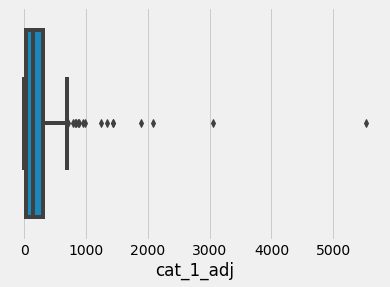

In [ ]:
# Taking a look at the values in a boxplot
sns.boxplot(complete_df.cat_1_adj, x='length')

It looks like there are some extreme outliers in data

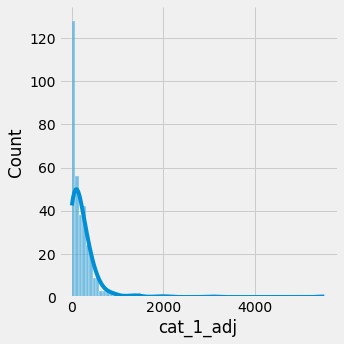

In [ ]:
#Looking at the distribution
sns.displot(complete_df.cat_1_adj, kde=True)

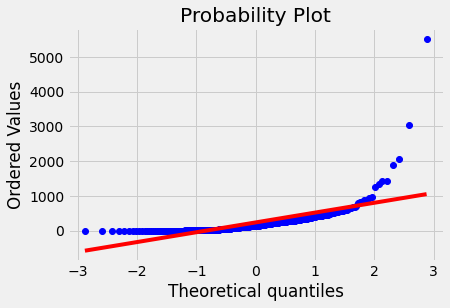

In [ ]:
# Looking at the probability
import scipy.stats as stats
res = stats.probplot(complete_df.cat_1_adj, plot=plt)

The data is not normally distributed

In [ ]:
# Shapiro test for distribution
from scipy.stats import shapiro

# normality test
stat, p = shapiro(complete_df.cat_1_adj)
print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks normally distributed (fail to reject H0)')
else:
    print('Sample does not look normally distributed (reject H0)')

Statistics=0.462, p=0.000
Sample does not look normally distributed (reject H0)


In [ ]:
from scipy.stats import normaltest

# normality test
stat, p = normaltest(complete_df.cat_1_adj)
print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks normally distributed (fail to reject H0)')
else:
    print('Sample does not look normally distributed (reject H0)')

Statistics=511.901, p=0.000
Sample does not look normally distributed (reject H0)


In [ ]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 533 entries, 13486 to 20402
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   country_area      533 non-null    object 
 1   primary_activity  533 non-null    object 
 2   primary_sector    533 non-null    object 
 3   primary_industry  533 non-null    object 
 4   revenue_final     533 non-null    float64
 5   cat_1_adj         348 non-null    float64
 6   cat_2_adj         281 non-null    float64
 7   cat_3_adj         344 non-null    float64
 8   cat_4_adj         285 non-null    float64
 9   cat_5_adj         334 non-null    float64
 10  cat_6_adj         387 non-null    float64
 11  cat_7_adj         342 non-null    float64
 12  cat_8_adj         74 non-null     float64
 13  cat_9_adj         147 non-null    float64
 14  cat_10_adj        50 non-null     float64
 15  cat_11_adj        187 non-null    float64
 16  cat_12_adj        201 non-null    floa

In [ ]:
# Changing sectors to categories and not objects
cols = ['primary_activity', 'primary_sector', 'primary_industry']
df4[cols] = df4[cols].astype('category')
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 533 entries, 13486 to 20402
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   country_area      533 non-null    object  
 1   primary_activity  533 non-null    category
 2   primary_sector    533 non-null    category
 3   primary_industry  533 non-null    category
 4   revenue_final     533 non-null    float64 
 5   cat_1_adj         348 non-null    float64 
 6   cat_2_adj         281 non-null    float64 
 7   cat_3_adj         344 non-null    float64 
 8   cat_4_adj         285 non-null    float64 
 9   cat_5_adj         334 non-null    float64 
 10  cat_6_adj         387 non-null    float64 
 11  cat_7_adj         342 non-null    float64 
 12  cat_8_adj         74 non-null     float64 
 13  cat_9_adj         147 non-null    float64 
 14  cat_10_adj        50 non-null     float64 
 15  cat_11_adj        187 non-null    float64 
 16  cat_12_adj        20

In [ ]:
# Dropping the pimary activity and industry and then encode the sector
df4 = df4.drop(['primary_activity', 'primary_industry'], axis = 1)

In [ ]:
# List of the primary sectors

activities =  df4[["primary_sector"]]                   # Making a frame with he activities

df4 = df4.drop(columns=["primary_sector"])

activities

,primary_sector
account_number,
13486,Financial services
868023,IT & software development
833279,Land & property ownership & development
865311,Web & marketing services
15282,Financial services
...,...
20398,Convenience retail
3944,Convenience retail
710,"Trading, wholesale, distribution, rental & lea..."


In [ ]:
# taking out the cat_1_adj values
cat_1 = df4[["cat_1_adj"]]   

df4 = df4.drop(columns=["cat_1_adj", "country_area"])

df4

,revenue_final,cat_2_adj,cat_3_adj,cat_4_adj,cat_5_adj,cat_6_adj,cat_7_adj,cat_8_adj,cat_9_adj,cat_10_adj,cat_11_adj,cat_12_adj,cat_13_adj,cat_14_adj,cat_15_adj,cat_16_adj,cat_17_adj
account_number,,,,,,,,,,,,,,,,,
13486,8.461602e+06,NaN,232.107345,NaN,NaN,101.517418,44.554210,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
868023,1.638863e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
833279,2.220000e+07,NaN,0.180180,NaN,NaN,0.127027,0.093243,0.048198,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
865311,2.945619e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15282,3.977400e+07,NaN,10.283100,NaN,0.437472,6.763212,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20398,1.325090e+11,NaN,NaN,NaN,NaN,0.113200,NaN,NaN,0.309413,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3944,1.959290e+11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
710,2.139890e+11,NaN,NaN,1.532810,NaN,0.021357,0.336651,NaN,3.464421,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Scaling the data using a standard scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()


scaler.fit(df4)

scaled_df = scaler.transform(df4)

df_scaled = pd.DataFrame(scaled_df, index=df4.index, columns=df4.columns)

df_scaled

,revenue_final,cat_2_adj,cat_3_adj,cat_4_adj,cat_5_adj,cat_6_adj,cat_7_adj,cat_8_adj,cat_9_adj,cat_10_adj,cat_11_adj,cat_12_adj,cat_13_adj,cat_14_adj,cat_15_adj,cat_16_adj,cat_17_adj
account_number,,,,,,,,,,,,,,,,,
13486,-0.347599,NaN,0.559898,NaN,NaN,18.553716,5.350205,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
868023,-0.347375,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
833279,-0.347211,NaN,-0.188856,NaN,NaN,-0.143744,-0.338504,-0.392564,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
865311,-0.347006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15282,-0.346715,NaN,-0.156240,NaN,-0.349362,1.080039,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20398,3.394506,NaN,NaN,NaN,NaN,-0.146294,NaN,NaN,-0.175101,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3944,5.185626,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
710,5.695680,NaN,NaN,-0.380289,NaN,-0.163231,-0.307361,NaN,-0.153525,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Adding back the activities
df5= pd.merge(df_scaled, cat_1, left_index=True, right_index=True)
df5

,revenue_final,cat_2_adj,cat_3_adj,cat_4_adj,cat_5_adj,cat_6_adj,cat_7_adj,cat_8_adj,cat_9_adj,cat_10_adj,cat_11_adj,cat_12_adj,cat_13_adj,cat_14_adj,cat_15_adj,cat_16_adj,cat_17_adj,cat_1_adj
account_number,,,,,,,,,,,,,,,,,,
13486,-0.347599,NaN,0.559898,NaN,NaN,18.553716,5.350205,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
868023,-0.347375,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
833279,-0.347211,NaN,-0.188856,NaN,NaN,-0.143744,-0.338504,-0.392564,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.137838
865311,-0.347006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15282,-0.346715,NaN,-0.156240,NaN,-0.349362,1.080039,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,442.004827
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20398,3.394506,NaN,NaN,NaN,NaN,-0.146294,NaN,NaN,-0.175101,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3944,5.185626,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
710,5.695680,NaN,NaN,-0.380289,NaN,-0.163231,-0.307361,NaN,-0.153525,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.845160


In [ ]:
# Creating dummies
activities = pd.get_dummies(activities)
for col in activities:
  activities[col] = activities[col].astype('category')

In [ ]:
df5= pd.merge(df5, activities, left_index=True, right_index=True)
df5

,revenue_final,cat_2_adj,cat_3_adj,cat_4_adj,cat_5_adj,cat_6_adj,cat_7_adj,cat_8_adj,cat_9_adj,cat_10_adj,...,primary_sector_Renewable energy equipment,primary_sector_Road transport,primary_sector_Specialized professional services,primary_sector_Textiles & fabric goods,primary_sector_Thermal power generation,primary_sector_Tobacco,"primary_sector_Trading, wholesale, distribution, rental & leasing",primary_sector_Transportation equipment,primary_sector_Web & marketing services,primary_sector_Wood & paper materials
account_number,,,,,,,,,,,,,,,,,,,,,
13486,-0.347599,NaN,0.559898,NaN,NaN,18.553716,5.350205,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
868023,-0.347375,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
833279,-0.347211,NaN,-0.188856,NaN,NaN,-0.143744,-0.338504,-0.392564,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
865311,-0.347006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,1,0
15282,-0.346715,NaN,-0.156240,NaN,-0.349362,1.080039,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20398,3.394506,NaN,NaN,NaN,NaN,-0.146294,NaN,NaN,-0.175101,NaN,...,0,0,0,0,0,0,0,0,0,0
3944,5.185626,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
710,5.695680,NaN,NaN,-0.380289,NaN,-0.163231,-0.307361,NaN,-0.153525,NaN,...,0,0,0,0,0,0,1,0,0,0


In [ ]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 533 entries, 13486 to 20402
Data columns (total 68 columns):
 #   Column                                                             Non-Null Count  Dtype   
---  ------                                                             --------------  -----   
 0   revenue_final                                                      533 non-null    float64 
 1   cat_2_adj                                                          281 non-null    float64 
 2   cat_3_adj                                                          344 non-null    float64 
 3   cat_4_adj                                                          285 non-null    float64 
 4   cat_5_adj                                                          334 non-null    float64 
 5   cat_6_adj                                                          387 non-null    float64 
 6   cat_7_adj                                                          342 non-null    float64 
 7   cat_8_adj  

In [ ]:
# Loading in the packages
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
# moving the target column to the last position
cols = list(df5.columns.values)
cols.pop(cols.index('cat_1_adj'))
df5 = df5[cols+['cat_1_adj']]

df5 = df5.fillna(0)

df5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 533 entries, 13486 to 20402
Data columns (total 68 columns):
 #   Column                                                             Non-Null Count  Dtype   
---  ------                                                             --------------  -----   
 0   revenue_final                                                      533 non-null    float64 
 1   cat_2_adj                                                          533 non-null    float64 
 2   cat_3_adj                                                          533 non-null    float64 
 3   cat_4_adj                                                          533 non-null    float64 
 4   cat_5_adj                                                          533 non-null    float64 
 5   cat_6_adj                                                          533 non-null    float64 
 6   cat_7_adj                                                          533 non-null    float64 
 7   cat_8_adj  

In [ ]:
df5

,revenue_final,cat_2_adj,cat_3_adj,cat_4_adj,cat_5_adj,cat_6_adj,cat_7_adj,cat_8_adj,cat_9_adj,cat_10_adj,...,primary_sector_Road transport,primary_sector_Specialized professional services,primary_sector_Textiles & fabric goods,primary_sector_Thermal power generation,primary_sector_Tobacco,"primary_sector_Trading, wholesale, distribution, rental & leasing",primary_sector_Transportation equipment,primary_sector_Web & marketing services,primary_sector_Wood & paper materials,cat_1_adj
account_number,,,,,,,,,,,,,,,,,,,,,
13486,-0.347599,0.000000,0.559898,0.000000,0.000000,18.553716,5.350205,0.000000,0.000000,0.0,...,0,0,0,0,0,0,0,0,0,0.000000
868023,-0.347375,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0,0,0,0,0,0,0,0,0,0.000000
833279,-0.347211,0.000000,-0.188856,0.000000,0.000000,-0.143744,-0.338504,-0.392564,0.000000,0.0,...,0,0,0,0,0,0,0,0,0,0.137838
865311,-0.347006,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0,0,0,0,0,0,0,1,0,0.000000
15282,-0.346715,0.000000,-0.156240,0.000000,-0.349362,1.080039,0.000000,0.000000,0.000000,0.0,...,0,0,0,0,0,0,0,0,0,442.004827
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20398,3.394506,0.000000,0.000000,0.000000,0.000000,-0.146294,0.000000,0.000000,-0.175101,0.0,...,0,0,0,0,0,0,0,0,0,0.000000
3944,5.185626,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0,0,0,0,0,0,0,0,0,0.000000
710,5.695680,0.000000,0.000000,-0.380289,0.000000,-0.163231,-0.307361,0.000000,-0.153525,0.0,...,0,0,0,0,0,1,0,0,0,98.845160


In [ ]:
# Creating x and y variables
x = df5.drop("cat_1_adj", axis=1)
X = x.values
y = df5["cat_1_adj"]
Y = y.values

In [ ]:
# creating a train and test group
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
# define and fit the model
from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor(n_neighbors=2, n_jobs=-1)
model.fit(X_train, y_train)

KNeighborsRegressor(n_jobs=-1, n_neighbors=2)

In [ ]:
# Gather predictions
preds = model.predict(X_test)

# display the actuals and predictions for the test set
print('Actuals for test data set')
print(y_test)
print('Predictions for test data set')
print(preds)

Actuals for test data set
[3.71698485e+02 3.11715554e+02 0.00000000e+00 2.79703860e+02
 9.88937510e+00 6.43722464e+01 5.66055686e+02 3.85331943e+02
 2.94747677e+02 0.00000000e+00 8.24004731e+01 0.00000000e+00
 1.87298935e+01 2.76237043e+02 9.27388295e+01 4.06668361e+01
 4.77129935e+01 0.00000000e+00 0.00000000e+00 3.08069365e+02
 1.41355317e+02 1.37837838e-01 0.00000000e+00 0.00000000e+00
 5.02753496e+02 0.00000000e+00 0.00000000e+00 1.69707233e+02
 1.93081499e+02 0.00000000e+00 2.67835000e+02 5.05459968e+01
 1.89295161e+03 0.00000000e+00 0.00000000e+00 5.86954477e+01
 2.00299952e+02 0.00000000e+00 0.00000000e+00 0.00000000e+00
 6.46125013e+02 0.00000000e+00 0.00000000e+00 3.64108232e+02
 2.73871364e+02 1.96388794e-02 0.00000000e+00 0.00000000e+00
 6.14479901e+02 0.00000000e+00 0.00000000e+00 2.21308251e+01
 0.00000000e+00 1.43351757e+02 0.00000000e+00 0.00000000e+00
 0.00000000e+00 1.37231196e+02 0.00000000e+00 4.16273281e+01
 6.23101842e+01 9.94845763e+01 2.59257257e+02 1.08938215e+0

In [ ]:
from sklearn.metrics import r2_score

print(r2_score(y_test,preds))

0.18106223746879946


In [ ]:
from sklearn.metrics import explained_variance_score

print(explained_variance_score(y_test,preds))

0.20651954813138163


In [ ]:
cols = df5.columns
target_col = 'cat_1_adj'
feat_cols = [c for c in cols if c != target_col]

In [ ]:
scores = []
print(f'Features: {feat_cols} \nTarget: {target_col}')

# remember the ending number for range is not inclusive
for k in range(2, 20):
    # output to let us know where we are
    print(f'Evaluating {k} clusters')
    
    # n_jobs=-1 will use all processors on your system
    model = KNeighborsRegressor(n_neighbors=k, n_jobs=-1)
    model.fit(X_train, y_train)
    scores.append(model.score(X_test, y_test))

Features: ['revenue_final', 'cat_2_adj', 'cat_3_adj', 'cat_4_adj', 'cat_5_adj', 'cat_6_adj', 'cat_7_adj', 'cat_8_adj', 'cat_9_adj', 'cat_10_adj', 'cat_11_adj', 'cat_12_adj', 'cat_13_adj', 'cat_14_adj', 'cat_15_adj', 'cat_16_adj', 'cat_17_adj', 'primary_sector_Air transport', 'primary_sector_Bars, hotels & restaurants', 'primary_sector_Biotech & pharma', 'primary_sector_Cement & concrete', 'primary_sector_Chemicals', 'primary_sector_Commercial & consumer services', 'primary_sector_Construction', 'primary_sector_Convenience retail', 'primary_sector_Crop farming', 'primary_sector_Discretionary retail', 'primary_sector_Electrical & electronic equipment', 'primary_sector_Energy utility networks', 'primary_sector_Entertainment facilities', 'primary_sector_Financial services', 'primary_sector_Food & beverage processing', 'primary_sector_Health care provision', 'primary_sector_IT & software development', 'primary_sector_Industrial support services', 'primary_sector_Intermodal transport & logis

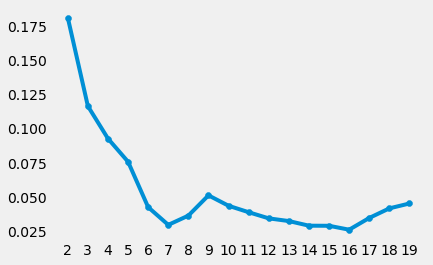

In [ ]:
# display the resutls
plt.plot(range(2, 20), scores)
plt.scatter(range(2, 20), scores)
plt.grid()
_ =plt.xticks(range(2, 20))

Based on the above chart the best model would use and N of 7

In [ ]:
# define and fit our model
model = KNeighborsRegressor(n_neighbors=7, n_jobs=-1)
model.fit(X_train, y_train)

# gather the predictations that our model made for our test set
preds = model.predict(X_test)

# display the actuals and predictions for the test set
print('Actuals for test data set')
print(y_test)
print('Predictions for test data set')
print(preds)

Actuals for test data set
[3.71698485e+02 3.11715554e+02 0.00000000e+00 2.79703860e+02
 9.88937510e+00 6.43722464e+01 5.66055686e+02 3.85331943e+02
 2.94747677e+02 0.00000000e+00 8.24004731e+01 0.00000000e+00
 1.87298935e+01 2.76237043e+02 9.27388295e+01 4.06668361e+01
 4.77129935e+01 0.00000000e+00 0.00000000e+00 3.08069365e+02
 1.41355317e+02 1.37837838e-01 0.00000000e+00 0.00000000e+00
 5.02753496e+02 0.00000000e+00 0.00000000e+00 1.69707233e+02
 1.93081499e+02 0.00000000e+00 2.67835000e+02 5.05459968e+01
 1.89295161e+03 0.00000000e+00 0.00000000e+00 5.86954477e+01
 2.00299952e+02 0.00000000e+00 0.00000000e+00 0.00000000e+00
 6.46125013e+02 0.00000000e+00 0.00000000e+00 3.64108232e+02
 2.73871364e+02 1.96388794e-02 0.00000000e+00 0.00000000e+00
 6.14479901e+02 0.00000000e+00 0.00000000e+00 2.21308251e+01
 0.00000000e+00 1.43351757e+02 0.00000000e+00 0.00000000e+00
 0.00000000e+00 1.37231196e+02 0.00000000e+00 4.16273281e+01
 6.23101842e+01 9.94845763e+01 2.59257257e+02 1.08938215e+0

In [ ]:
differs = y_test - preds

print(f'Differences between the two sets:\n{differs}\n')

print(f'r2_score: {r2_score(y_test,preds)}')

Differences between the two sets:
[ 3.57925961e+02  2.81535141e+02 -1.91603474e+01  7.82123928e+01
 -7.08959590e+01 -9.65948605e+00  4.67740149e+02  2.32678107e+02
  1.76828988e+02  0.00000000e+00 -6.82540211e+01 -3.16067225e+01
 -2.04584353e+02  1.48252774e+02 -7.84524036e+01 -1.21301160e+02
  1.93194075e+01 -3.95002853e+01  0.00000000e+00  2.28677637e+02
 -2.07217407e+01 -2.32106747e+01 -1.61092507e+02 -1.91603474e+01
  6.55308255e+01  0.00000000e+00 -3.95002853e+01  1.41313647e+02
  1.39944263e+02 -7.50666288e+01  4.31952294e-01 -6.91206007e+01
  1.48067652e+03 -1.91137267e+01 -2.94860485e+02  3.62365317e+01
  3.51203052e+01 -2.83935860e+01 -3.95002853e+01 -4.09310617e+02
 -6.54253147e+01 -2.94860485e+02 -8.89848669e+01  3.32997793e+02
  5.08136710e+01 -3.70808539e+00 -1.37752007e+02 -4.09310617e+02
  5.60977999e+01  0.00000000e+00 -1.61092507e+02 -1.05853445e+02
 -1.01591411e+02  1.02231708e+02 -1.91603474e+01 -4.09310617e+02
 -5.52653019e+01  6.21071365e+01 -1.08648189e+02 -7.0784

#K-Fold Cross-Validation

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error

from matplotlib import pyplot

In [ ]:
# Spot Check Algorithms
models = []
models.append(('LR', LinearRegression()))
models.append(('LASSO', Lasso()))
models.append(('EN', ElasticNet()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))


In [ ]:
# evaluate each model in turn
seed = 42
num_folds = 5
scoring = 'neg_mean_squared_error'

In [ ]:
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: -33831367831494983581819731968.000000 (44470394346383826219194908672.000000)
LASSO: -48450.647042 (23753.341300)
EN: -48594.457111 (25742.380176)
KNN: -49045.058885 (28909.006761)
CART: -81713.731064 (36167.468815)


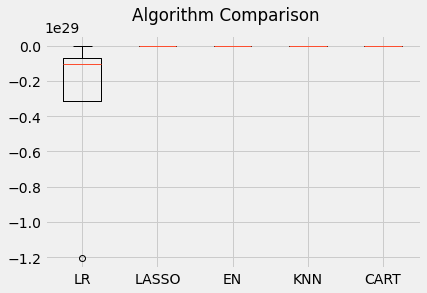

In [ ]:
# Compare Algorithms
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

# Linear Regression Model

In [ ]:
# Loading it in

from sklearn.linear_model import LinearRegression


In [ ]:
model = LinearRegression()

In [ ]:
model.fit(X, Y)

LinearRegression()

In [ ]:
 model = LinearRegression().fit(X, Y)

In [ ]:
r_sq = model.score(X, Y)
print(f"coefficient of determination: {r_sq}")

coefficient of determination: 0.3152335036497773


In [ ]:
! pip install h2o

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.7/177.7 MB 6.0 MB/s eta 0:00:00


In [ ]:
import h2o

h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.17" 2022-10-18; OpenJDK Runtime Environment (build 11.0.17+8-post-Ubuntu-1ubuntu220.04); OpenJDK 64-Bit Server VM (build 11.0.17+8-post-Ubuntu-1ubuntu220.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.8/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpstdjts9h
  JVM stdout: /tmp/tmpstdjts9h/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpstdjts9h/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,06 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.40.0.1
H2O_cluster_version_age:,20 days
H2O_cluster_name:,H2O_from_python_unknownUser_b6tlor
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.172 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [ ]:
hf = h2o.H2OFrame(df5)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [ ]:
hf

revenue_final,cat_2_adj,cat_3_adj,cat_4_adj,cat_5_adj,cat_6_adj,cat_7_adj,cat_8_adj,cat_9_adj,cat_10_adj,cat_11_adj,cat_12_adj,cat_13_adj,cat_14_adj,cat_15_adj,cat_16_adj,cat_17_adj,primary_sector_Air transport,"primary_sector_Bars, hotels & restaurants",primary_sector_Biotech & pharma,primary_sector_Cement & concrete,primary_sector_Chemicals,primary_sector_Commercial & consumer services,primary_sector_Construction,primary_sector_Convenience retail,primary_sector_Crop farming,primary_sector_Discretionary retail,primary_sector_Electrical & electronic equipment,primary_sector_Energy utility networks,primary_sector_Entertainment facilities,primary_sector_Financial services,primary_sector_Food & beverage processing,primary_sector_Health care provision,primary_sector_IT & software development,primary_sector_Industrial support services,primary_sector_Intermodal transport & logistics,primary_sector_Land & property ownership & development,primary_sector_Leisure & home manufacturing,primary_sector_Light manufacturing,primary_sector_Marine transport,"primary_sector_Media, telecommunications & data center services",primary_sector_Medical equipment & supplies,primary_sector_Metal products manufacturing,"primary_sector_Metal smelting, refining & forming",primary_sector_Metallic mineral mining,primary_sector_Non-energy utilities,primary_sector_Oil & gas extraction & production,primary_sector_Oil & gas processing,primary_sector_Oil & gas retailing,primary_sector_Other materials,primary_sector_Other mineral mining,primary_sector_Other services,primary_sector_Paper products & packaging,primary_sector_Plastic product manufacturing,primary_sector_Powered machinery,primary_sector_Print & publishing services,primary_sector_Rail transport,primary_sector_Renewable energy equipment,primary_sector_Road transport,primary_sector_Specialized professional services,primary_sector_Textiles & fabric goods,primary_sector_Thermal power generation,primary_sector_Tobacco,"primary_sector_Trading, wholesale, distribution, rental & leasing",primary_sector_Transportation equipment,primary_sector_Web & marketing services,primary_sector_Wood & paper materials,cat_1_adj
-0.347599,0,0.559898,0,0,18.5537,5.3502,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
-0.347375,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
-0.347211,0,-0.188856,0,0,-0.143744,-0.338504,-0.392564,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.137838
-0.347006,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
-0.346715,0,-0.15624,0,-0.349362,1.08004,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,442.005
-0.346679,-0.387834,0,0,-0.361723,-0.111136,0.911653,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.90424
-0.346411,0.151841,-0.108736,0,0.270127,0.332551,-0.0920041,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,371.698
-0.345842,0,0,0,0,0.174666,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
-0.345818,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
-0.345702,0,-0.174322,0,-0.406219,0,0,0,0,0,0,0,-0.181997,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
hf.types

{'revenue_final': 'real',
 'cat_2_adj': 'real',
 'cat_3_adj': 'real',
 'cat_4_adj': 'real',
 'cat_5_adj': 'real',
 'cat_6_adj': 'real',
 'cat_7_adj': 'real',
 'cat_8_adj': 'real',
 'cat_9_adj': 'real',
 'cat_10_adj': 'real',
 'cat_11_adj': 'real',
 'cat_12_adj': 'real',
 'cat_13_adj': 'real',
 'cat_14_adj': 'real',
 'cat_15_adj': 'real',
 'cat_16_adj': 'real',
 'cat_17_adj': 'real',
 'primary_sector_Air transport': 'int',
 'primary_sector_Bars, hotels & restaurants': 'int',
 'primary_sector_Biotech & pharma': 'int',
 'primary_sector_Cement & concrete': 'int',
 'primary_sector_Chemicals': 'int',
 'primary_sector_Commercial & consumer services': 'int',
 'primary_sector_Construction': 'int',
 'primary_sector_Convenience retail': 'int',
 'primary_sector_Crop farming': 'int',
 'primary_sector_Discretionary retail': 'int',
 'primary_sector_Electrical & electronic equipment': 'int',
 'primary_sector_Energy utility networks': 'int',
 'primary_sector_Entertainment facilities': 'int',
 'primary_

gbm Model Build progress: |

/usr/local/lib/python3.8/dist-packages/h2o/estimators/estimator_base.py:193: RuntimeWarning: Dropping bad and constant columns: [primary_sector_Crop farming]
  warnings.warn(mesg["message"], RuntimeWarning)


██████████████████████████████████████████████████████| (done) 100%


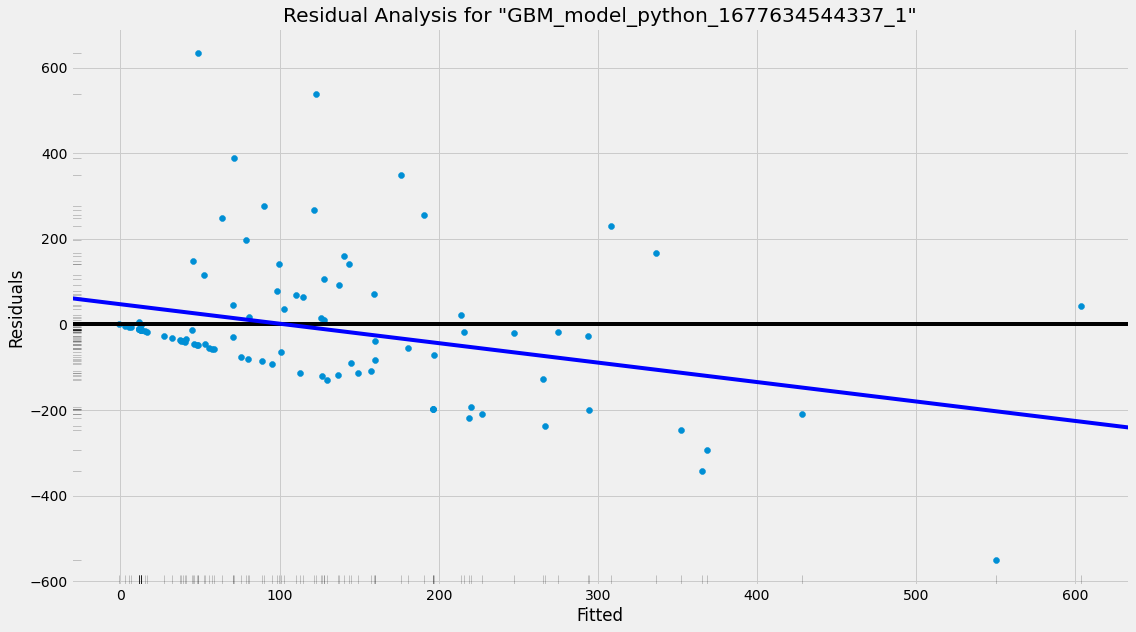

In [ ]:
from h2o.estimators import H2OGradientBoostingEstimator

predictors = hf.columns
predictors.remove('cat_1_adj')
response = 'cat_1_adj'

# Split the dataset into a train and valid set:
train, test = hf.split_frame(ratios=[.8], seed=1234, )

# Build and train the model:
gbm = H2OGradientBoostingEstimator()
gbm.train(y = response, training_frame = train)



# Eval performance:
gbm.residual_analysis_plot(test)

#Lasso Model

In [ ]:
df5.head(2)

,revenue_final,cat_2_adj,cat_3_adj,cat_4_adj,cat_5_adj,cat_6_adj,cat_7_adj,cat_8_adj,cat_9_adj,cat_10_adj,...,primary_sector_Road transport,primary_sector_Specialized professional services,primary_sector_Textiles & fabric goods,primary_sector_Thermal power generation,primary_sector_Tobacco,"primary_sector_Trading, wholesale, distribution, rental & leasing",primary_sector_Transportation equipment,primary_sector_Web & marketing services,primary_sector_Wood & paper materials,cat_1_adj
account_number,,,,,,,,,,,,,,,,,,,,,
13486,-0.347599,0.0,0.559898,0.0,0.0,18.553716,5.350205,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0.0
868023,-0.347375,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0.0


In [ ]:
from sklearn import linear_model

In [ ]:
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import Lasso
from numpy import absolute

data = df5.values
X, y = data[:, :-1], data[:, -1]


model = Lasso(alpha=1.0)
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# force scores to be positive
scores = absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (mean(scores), std(scores)))

Mean MAE: 164.482 (41.074)


In [ ]:
## Tunning lasso regression model

from numpy import arange
from sklearn.model_selection import RepeatedKFold
import pandas as pd
from sklearn.linear_model import LassoCV

## load the dataset
data = df5.values
X, y = data[:, :-1], data[:, -1]

model_lasso = Lasso(alpha=1)
model_lasso.fit(X_train, y_train)
pred_train_lasso= model_lasso.predict(X_train)
pred_test_lasso= model_lasso.predict(X_test)


print(np.sqrt(mean_squared_error(y_train,pred_train_lasso)))
print(r2_score(y_train, pred_train_lasso))
print(np.sqrt(mean_squared_error(y_test,pred_test_lasso)))
print(r2_score(y_test, pred_test_lasso))




196.18540267286676
0.2621877552668028
649.6135153199939
-0.014937589693385434


In [ ]:
# grid search hyperparameters for lasso regression
from numpy import arange
from pandas import read_csv
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import Lasso
# load the dataset


data = df5.values

X, y = data[:, :-1], data[:, -1]
# define model
model = Lasso()
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# define grid
grid = dict()
grid['alpha'] = arange(0, 1, 0.01)
# define search
search = GridSearchCV(model, grid, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# perform the search
results = search.fit(X, y)
# summarize
print('MAE: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)

MAE: -164.516
Config: {'alpha': 0.99}


In [ ]:
data = df5.values
X, y = data[:, :-1], data[:, -1]


model = Lasso(alpha=0.21)
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# force scores to be positive
scores = absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (mean(scores), std(scores)))
print(np.sqrt(mean_squared_error(y_train,pred_train_lasso)))
print('The r2 value is', r2_score(y_train, pred_train_lasso))
print('The mean squared error is', np.sqrt(mean_squared_error(y_test,pred_test_lasso)))
print(r2_score(y_test, pred_test_lasso))

Mean MAE: 169.756 (44.519)
196.18540267286676
The r2 value is 0.2621877552668028
The mean squared error is 649.6135153199939
-0.014937589693385434
